In [1]:
# 지도 학습의 한 종류인 '회귀 문제'를 이해하고
# KNN 알고리즘을 사용해 농어의 무게를 예측하는 회귀 문제를 풀어볼겁니다

# 회귀 (Regression)
KNN regression 사용

In [2]:
# 지도학습은 target y 의 형태에 따라
# 회귀(regression) 와 분류 (classification) 으로 나뉜다.

# '분류' 는 몇개의 클래스 중 하나로 분류 하는 문제
# '회귀' 는 임의의 어떤 숫자를 예측 하는 문제
#   - ex)내년 경제 성장률 예측, 주가 예측
#        주문후 배달 도착시간 예측
#   - 회귀 문제의 출력은 정해진 클래스가 아니라 '임의의 수치'

In [3]:
# 농어의 '길이, 높이, 두께' 측정한 데이터로 '무게'를 예측하기
# 무게는 '어떠한 숫자' 도 될수 있다 (회귀문제!)


# ■ k-최근접 이웃 회귀
k-nearest neighbor (KNN) regression

In [4]:
# 우선 'k-최근접 이웃 분류 알고리즘' 와 'k-최근접 이웃 회귀 알고리즘' 에 대해 알아보자

In [5]:
# k-최근접 이웃 분류 알고리즘

# 1. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
# 2. 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측.

In [6]:
# k-최근접 이웃 회귀 알고리즘
# '분류' 와 같은 방식으로, 예측하려는 샘플에 가장 가까운 샘플 k개를 선택.
# 하지만 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 '임의의 수치' 가 된다.
# 이웃 샘플의 수치를 사용해 새로운 샘플 X 의 타킷을 예측하는 방법은 ?
#    => 바로 이 수치들의 평균값을 구하면 된다.

# 데이터 준비

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
base_path = r'/content/drive/MyDrive/KoreaIT (코리아it)/250715 💚자연어처리S4/[자연어처리]/dataset(NLP2507)'


In [9]:
file_path = os.path.join(base_path, 'fish.csv')
fish_df = pd.read_csv(file_path)
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [10]:
# 농어의 길이(특징, feature) 가 주어졌을때 무게(target) 를 예측해보자.

In [11]:
# 농어의 길이 (특성: feature)
perch_length = fish_df[fish_df.Species == 'Perch']['Length'].values
print(perch_length)

# 농어의 무게(target 값!)
perch_weight = fish_df[fish_df.Species == 'Perch']['Weight'].values
print(perch_weight)


[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


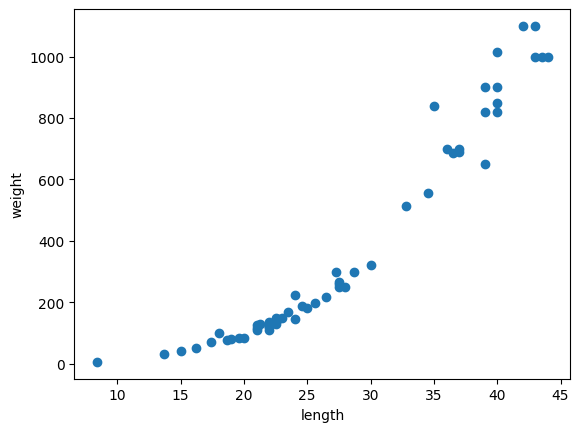

In [12]:
# 이 데이터 들이 어떠한 형태를 보여주는지 scatter plot(산점도) 를 그려 보자
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
# 이제 데이터를 training / test 셋으로 나누겠습니다.
from sklearn.model_selection import train_test_split

In [14]:
# 학습교안과 동일한 결과를 유지하기 위해  ransom_state 값을 주겠습니다.  디폴트 test 비율 30%
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [15]:
# 또 명심!
# scikit-learn 머신러닝에 사용할(학습, 테스트, 예측) 데이터세트는 feature 들의 벡터여야 한다.
# (즉 2차원 배열 형태)

In [16]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [17]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# 결정 계수 ($R^2$)


KNeighborsRegressor 의 score 값

In [18]:
# KNeighborsRegressor 클래스:
# scikit-learn  에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스
#  KNeighborsClassifier 와 비슷
from sklearn.neighbors import KNeighborsRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#kneighborsregressor

```python
class sklearn.neighbors.KNeighborsRegressor(
  n_neighbors=5,
  *,
  weights='uniform',
  algorithm='auto',
  leaf_size=30,
  p=2,
  metric='minkowski',
  metric_params=None,
  n_jobs=None)
```

In [19]:
# 모델 생성
knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)


KNeighborsRegressor()

In [20]:
# 점수 확인
knr.score(test_input, test_target)


0.992809406101064

In [21]:
# '분류' 문제의 경우 test 세트의 샘플을 정확하게 분류한 개수의 비율이다. (accuracy: 정확도)
# '회귀' 문제는 정확한 숫자를 맞힌다는것이 거의 불가능하다.
# 예측하는 값이나 타킷 모두 임의의 수치이기 때문이다.

# '회귀' 의 경우 평가방식이 조금 다르다
# 이 점수를 '결정계수' (Coefficient of determination) 이라고 부름.
# 간단히 R² 라고도 부름

# 이 값은 다음과 같은 식으로 계산됨

#           (target - 예측)² 의 합
#  R² = 1 - ──────────────────
#           (target - 평균)² 의 합

In [22]:
"""
샘플의 타켓과 예측한 값의 차이를 제곱하여 더함.
그 다음 타겟과 타켓 평균의 차이를 제곱하여 더한 값으로 나누게 됨.
만약 타킷의 평균 정도를 예측하는 수준이라면 (즉 분자와 분모가 비슷해져) R² 는 0 에 가까와 지고,
예측이 타켓에 아주 가까워 지면 (분자가 0에 가까워지기 때문에) 1에 가까운 값이 됨.
"""

None

In [23]:
# sklearn.metrics 패키지에는 다양한 평가 측정 도구를 제공한다.
# 그 중에서 mean_absolute_error() 는 타깃과 예측의 절대값 오차를 평균하여 반환함.
from sklearn.metrics import mean_absolute_error

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error

```python
sklearn.metrics.mean_absolute_error(
  y_true, y_pred,
  *,
  sample_weight=None, multioutput='uniform_average')
```


In [24]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)


In [25]:
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [26]:
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [27]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

In [28]:
# 이번에는 test 세트가 아닌 train 세트로 평가해보자.  test세트 점수와는 다를 것이다.
# ↓과연 여기서 무엇을 발견할수 있을까?

# 과대적합(Overfit) vs 과소적합(Underfit)  

In [29]:
# train 데이터 를 사용하여 R² 점수를 확인해보자.
knr.score(train_input, train_target)


0.9698823289099254

In [30]:
"""
당연하지만, train세트로 훈련한 모델은 train세트 평가점수가 test세트 평가 점수보다 더 높다.

머신러닝의 목표는 사실 train 세트 평가점수보다 test세트 평가점수가 높은 거긴 하다..

train 세트 평가점수가 높았는데, test 세트 점수가 많이 낮다면
=> 모델이 train  세트에 overfit(과대적합) 되었다고 한다.

train 세트 평가점수보다 test세트 점수가 더 높거나, 두 점수 모두 낮으면
=> 모델이 train 세트에 underfit(과소적합) 되었다고 함.
   모델이 너무 '단순' 하여 train 세트에 적절히 훈련되지 않은 경우.

혹은 데이터 세트 크기가 너무 작아도 위 증상 발생할수 있다!
"""
None

In [31]:
# 이 문제를 어떻게 해결할수 있나?

# => 모델을 조금 더 복잡하게 만들어 보자.  모델이 좀더 복잡해질수록 train 세트에 더 잘 맞게 되고
# test 세트의 점수는 조금 낮아질 거다.

# k-최근접 이웃 알고리즘의 복잡도를 높이는 방법은 '이웃의 개수 k' 를 줄이는 거다.
#    이웃의 개수를 줄이면 훈련 세트에 있는 '국지적인 패턴' 에 민감해지고,
#    이웃의 개수를 늘리면 데이터 전반에 있는 '일반적인 패턴' 을 따르게 될것이다.


In [32]:
# 이웃의 갯수(k)를 3으로 설정합니다
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)

knr.score(train_input, train_target)

0.9804899950518966

In [33]:
# ↑ k 값을 줄였더니 train 세트의 R² 점수가 높아졌다.

# ↓이제 test 세트의 점수를 확인해보자

In [34]:
knr.score(test_input, test_target)


0.9746459963987609

# 단순한 모델 vs 복잡한 모델에 대한 시각화
k 값의 변화에 따른 결과 변화

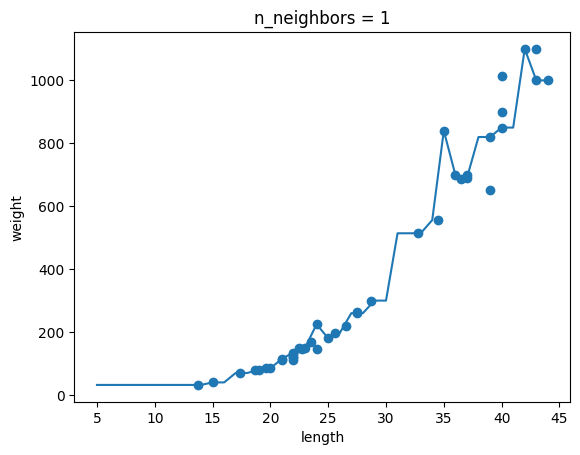

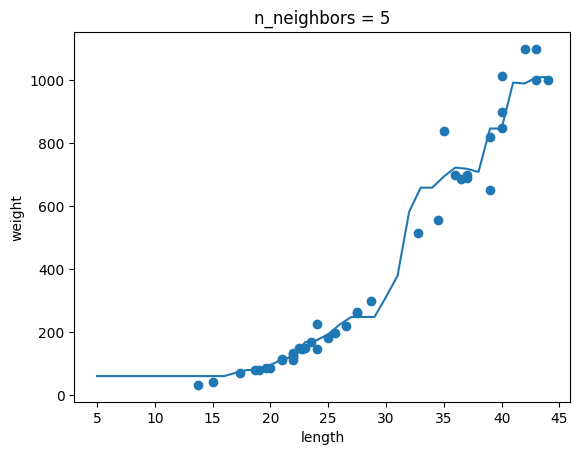

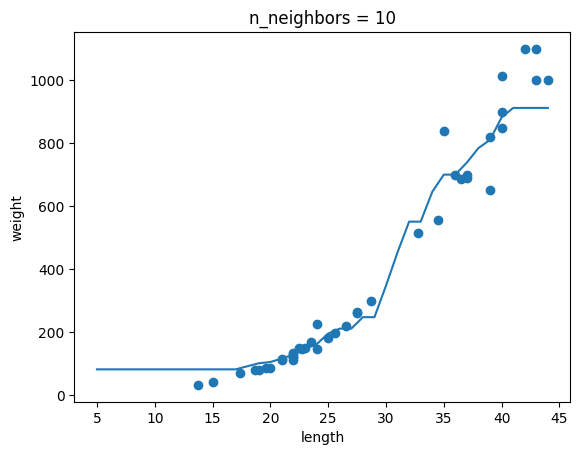

In [35]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 농어의 length를 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)  # 예측값으로 만들어야 하기에 feature vector 로 만든다

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)

    plt.title('n_neighbors = {}'.format(n))  # plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# KNN Regressor 의 문제점

In [36]:
# 상황]  학습된 모델에 길이가 큰 50cm 농어의 무게를 예측해보기로 했다.  과연 어떠할까?


In [37]:
# k-최근접 이웃 개수를 3으로 하는 회귀 모델을 훈련합니다
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [38]:
# 위 모델을 사용하여 길이가 50cm 인 농어의 무게를 예측해봅니다.
knr.predict([[50]])


array([1033.33333333])

In [39]:
# 'train세트' 와 '50cm 농어' 그리고 이 농어의 'knn 이웃'을 시각화 (scatter plot) 으로 시각화 해보자.
# KNN 의 kneighbors() 메소드를 사용하면 가장 가까운 이웃까지의 거리와 이웃샘플의 인덱스를 얻을수 있다.


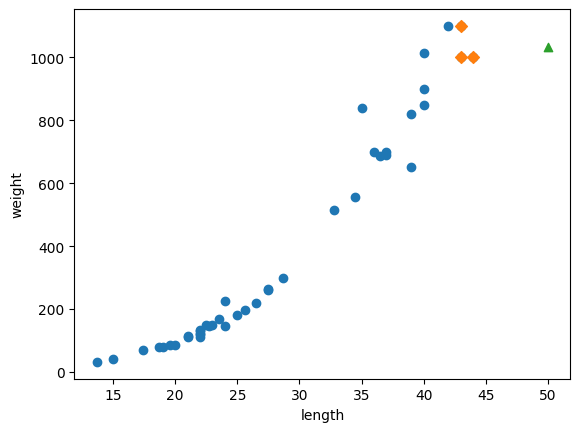

In [40]:
# 50cm 농어의 무게를 판단하기 위해 참조한 이웃(들) 정보
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
# 이웃 샘플의 타켓 평균을 구해봅니다.
np.mean(train_target[indexes])


np.float64(1033.3333333333333)

In [42]:
# 길이가 100cm 인 농어도 1,033g 으로 예측할겁니다.
knr.predict([[100]])


array([1033.33333333])

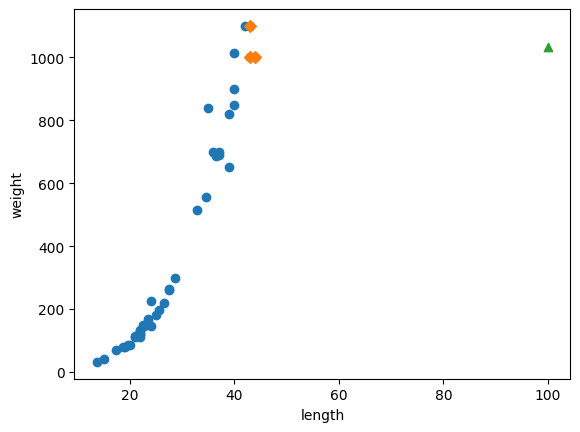

In [43]:
# 한번더 시각화를 해봅시다

# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [44]:
# KNN Regressor 의 문제점(한계점!)
# KNN 을 사용하여 위 문제를 해결하려면,
# 결국 length 가 더 큰 농어들의 데이터를 포함하여 train 세트를 구성해야 한다.
# 그러나, 이러한 상황이 여의치 않을수 있는겁니다.

# ■ 선형 회귀 (Linear Regression)

In [45]:
# 선형회귀는
# 특성(feature) 가 '한개'인경우 어떤 '직선' 을 학습하는 알고리즘.
# 즉 '특성을 가장 잘 나타낼수 있는 직선'을 찾아야 함.

In [46]:
from sklearn.linear_model import LinearRegression
# sklearn.linear_model 패키지 아래에 선형 모델 관련 알고리즘들이 있다.
# 훈련, 평가, 예측하는 메소드 들은 이전과 모두 동일하다 (scikit-learn 의 장점)
# fit(), score(), predict() 등...

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
```python
class sklearn.linear_model.LinearRegression(
  *,
  fit_intercept=True,
  copy_X=True,
  n_jobs=None,
  positive=False)
```

In [47]:
# 선형 회귀 모델로 훈련
lr = LinearRegression()
lr.fit(train_input, train_target)


LinearRegression()

In [48]:
# 50cm 농어에 대한 예측!
lr.predict([[50]])


array([1241.83860323])

In [49]:
# 선형회귀는 농어의 무게를 예측하는 '직선' 을 학습하였을테고
# 이는 아래와 같다.

# 농어의 무게 = a x length + b

![](https://velog.velcdn.com/images/leeeeeyeon/post/7127377b-efd6-46d8-9cf9-09bb7a8cf943/image.png)

In [50]:
# LinearRegression 이 찾은
#  기울기 : coef_    <- 머신러닝에서는 이를 '기울기', '계수' 혹은 '가중치(weight)' 라고도 부름.
#  절편 : intercept_


In [51]:
lr.coef_, lr.intercept_


(array([39.01714496]), np.float64(-709.0186449535477))

- 모델 파라미터 (Model parameter)
  - 머신러닝 알고리즘이 찾아낸 값

- 모델 기반 학습 (Model based learning)
  - 최적의 모델 파라미터를 찾는 학습
  - LinearRegression 은 모델 기반 학습

- 사례 기반 학습 (Instance based learning)
  - 훈련 데이터를 저장한것만으로도 훈련하여 학습
  - KNN 알고리즘은 사례 기반 학습


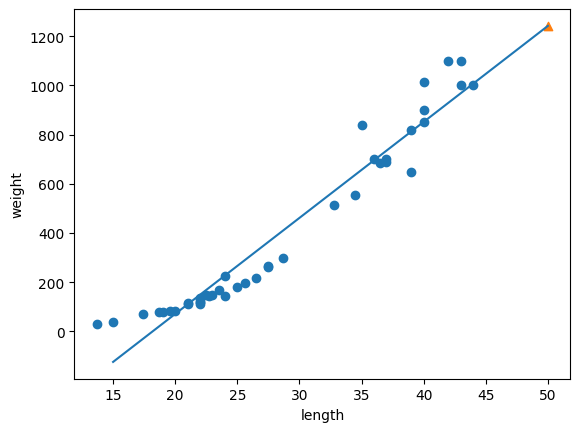

In [52]:
# 농어의 길이 15에서 50까지 직선으로 시각화 합니다.
# 이 직선을 그리려면 앞에서 구한 기울기와 절편을 사용하여
# (15, 15x39-709) 와 (50, 50x39-709) 두 점을 이으면 됩니다.
# train 세트와 산점도를 함께 그려봅니다.

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [53]:
# score 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


0.939846333997604
0.8247503123313558


In [54]:
"""
문제점 고찰

과연 overfit? underfit?

train 세트 점수와 test 세트 점수 차이도 크고.
train 세트 점수도 그닥 높지 않다.
=> underfit 을 의심해봐야 한다.


↓ 또 다른 문제.
"""
None

# 다항회귀 (Polynomial Regression)

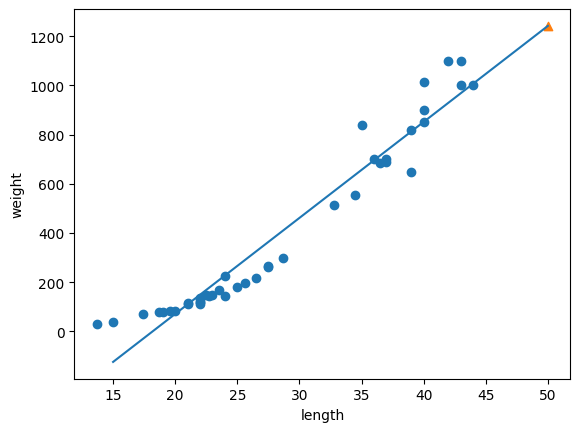

In [55]:
# 다시 시각화를 해서 보면...

plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [56]:
# 또다른 문제점
#  왼쪽으로 갈수록 weight 가 음수 가 된다? <- 있을수 없는 일!

In [57]:
# 최적의 '직선' 을 찾기보다 최적의 '곡선' 을 찾아야 할것이다.
# 마치 아래 그림처럼..  2차 방정식 곡선의 a, b, c  를 찾아내는 것이다!

![](https://velog.velcdn.com/images/leeeeeyeon/post/3aef313a-b68c-4b8d-acfa-0ad0eb989c60/image.png)

In [58]:
"""
이러한 2차 방정식 그래프를 그리려면 '길이를 제곱한 항'이 훈련세트에 추가되어야 합니다.
numpy 를 사용하면 손쉽게 만들수 있다.

무게 = a x 길이² - b x 길이 + c   <=  길이의 제곱과 원래길이 두가지 모두 필요하다.

 length² ←  length
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 ...
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]
"""
None

In [59]:
# 기존 input 을 제곱한것과 나란히 붙이면 됨.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [60]:
# 확인
print(train_poly[:10])


[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]]


In [61]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [62]:
# 이제 train_poly 를 사용해 선형 회귀 모델을 다시 훈련해보자
# 훈련 세트에 제곱항을 추가했지만, '타킷 값은 그대로 사용'한다.

# 훈련한 다음 50cm 짜리 농어에 대해 무게를 예측해 볼겁니다.
# 앞서 훈련 세트에서 했던 것처럼 테스트 할때에도
# 이 모델에 '농어길이의 제곱'과 '원래 길이'를 함께 넣어주어야 합니다


In [63]:
lr = LinearRegression()
lr.fit(train_poly, train_target)


LinearRegression()

In [64]:
# 50cm 농어의 무게 예측하기!
lr.predict([[50 ** 2, 50]])


array([1573.98423528])

In [65]:
# 모델이 훈련한 '계수'와 '절편' 확인
print(lr.coef_, lr.intercept_)


[  1.01433211 -21.55792498] 116.0502107827827


In [66]:
# [  1.01433211 -21.55792498] 116.0502107827827

# 무게 = 1.01 x 길이² - 21.5 x 길이 + 116.06

In [67]:
"""
2차 방정식은 직선 형태가 아닌데 선형회귀 라고 말할수 있나?

그렇다!

무게 = 1.01 x 왕길이 - 21.5 x 길이 + 116.06

"""
None

In [68]:
# 이러한 방정식을 다항식 (polynomial) 이라 부르며
# 다항식을 사용한 선형 회귀를 다항회귀 (polynomial regression) 이라 한다


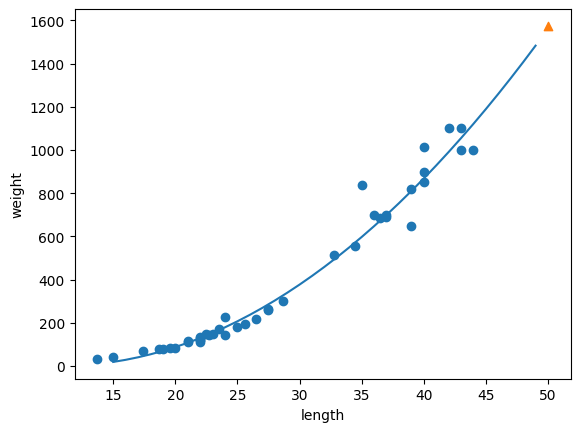

In [69]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [70]:
# 훈련세트와 테스트 세트의 R² 점수 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))



0.9706807451768623
0.9775935108325122


### 선형회귀를 사용하여 train 세트 범위 밖의 샘플 예측하기
- 문제 해결 단계

## 여기까지의 문제점 고찰

In [ ]:
"""
여전히 train 세트보다 test 세트의 점수가 높은 점 -> underfit 상황 의심. -> 모델의 복잡도 증가.
"""
None

In [71]:
# 원본 데이터에는 농어의 Length(길이) 말고도 높이(Height) 와 두께(Width) 도 있었다.
# ↓ 확인해보자
fish_df.columns

# ↓ 높이 말고도 '무게' 에 영향을 주는 다른 특징들이 있다!
#   선형회귀는 영향을 주는 특성이 많을수록 효과가 크다.


Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

# ■ 특성공학, 다중회귀 (multiple regression)

In [ ]:
# 입력데이터가 농어의 '길이' 뿐인가?
# 선형회귀는 '특성' 많을수록 좋은 효과를 기대해볼수 있다.
# 직전에는 '하나의 특성'을 사용하여 선형 회귀 모델을 훈련시켜보았다.
# '여러개의 특성'을 사용한 선형 회귀를 다중회귀 (multiple regression) 이라 한다

In [ ]:
# 이전 예제에서 '한개의 특성'을 사용했을때 선형회귀 모델이 학습하는 것은 '2차원 평면상의직선(곡선)'입니다.
# 2개의 특성을 학습하면 무엇을 학습하게 될까요?

![](https://media.licdn.com/dms/image/D4D12AQEhqo6dQF0_IA/article-cover_image-shrink_720_1280/0/1698041185106?e=2147483647&v=beta&t=8YFNXke-HHsGaUsq63x48xuUFfNYdbSTIPhgdH45gQI)


In [ ]:
# '특성' 이 2개 이면 '평면' 을 학습하게 됩니다
# 특성이 2개 + 타겟값 1개  => 3차원 공간을 형성하게 됨.

# 이때 선형 회귀 방정식은

# 타킷 = a x feature1 + b x feature2 + c (절편)  의 평면이 됩니다.

# 만약 특성에 3개 이상이면?   =>  그림으로는 그릴수 없는 초평면..

# 선형회귀를 단순한 직선이나 평면으로 생각하여 성능이 무조건 낮다고 오해해서는 안됩니다.
# 특성이 많은 고차원에서 선형회귀는 매우 복잡한 모델도 표현할수도 있다!


## 특성공학 이란
feature enginering

- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [ ]:
# 이번 예제에서
# 농어의 길이 뿐 아니라 농어의 '높이(Height)'와 '두께(Width)'도 함께 사용.
# 3개의 특성에 각각 제곱하여 추가
# 각 특성을 서로 곱해서 '또 다른 특성'도 만들어 보자

## 데이터 준비

In [72]:
fish_df # 확인

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [73]:
# 농어의 길이, 높이, 두께
                                             # ↓ TODO
perch_df = fish_df[fish_df.Species == 'Perch'][['Length', 'Height', 'Width']]
perch_df

,Length,Height,Width
72,8.4,2.1120,1.4080
73,13.7,3.5280,1.9992
74,15.0,3.8240,2.4320
75,16.2,4.5924,2.6316
76,17.4,4.5880,2.9415
77,18.0,5.2224,3.3216
78,18.7,5.1992,3.1234
79,19.0,5.6358,3.0502
80,19.6,5.1376,3.0368
81,20.0,5.0820,2.7720


In [74]:
# numpy 배열로 변환한후 선형회귀 모델을 훈련시켜 볼 거다

# numpy 배열 변환
perch_full = perch_df.to_numpy()
perch_full

array([[ 8.4   ,  2.112 ,  1.408 ],
       [13.7   ,  3.528 ,  1.9992],
       [15.    ,  3.824 ,  2.432 ],
       [16.2   ,  4.5924,  2.6316],
       [17.4   ,  4.588 ,  2.9415],
       [18.    ,  5.2224,  3.3216],
       [18.7   ,  5.1992,  3.1234],
       [19.    ,  5.6358,  3.0502],
       [19.6   ,  5.1376,  3.0368],
       [20.    ,  5.082 ,  2.772 ],
       [21.    ,  5.6925,  3.555 ],
       [21.    ,  5.9175,  3.3075],
       [21.    ,  5.6925,  3.6675],
       [21.3   ,  6.384 ,  3.534 ],
       [22.    ,  6.11  ,  3.4075],
       [22.    ,  5.64  ,  3.525 ],
       [22.    ,  6.11  ,  3.525 ],
       [22.    ,  5.875 ,  3.525 ],
       [22.    ,  5.5225,  3.995 ],
       [22.5   ,  5.856 ,  3.624 ],
       [22.5   ,  6.792 ,  3.624 ],
       [22.7   ,  5.9532,  3.63  ],
       [23.    ,  5.2185,  3.626 ],
       [23.5   ,  6.275 ,  3.725 ],
       [24.    ,  7.293 ,  3.723 ],
       [24.    ,  6.375 ,  3.825 ],
       [24.6   ,  6.7334,  4.1658],
       [25.    ,  6.4395,  3

In [75]:
# target 값 확인하기
perch_weight


array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [76]:
# train 세트와 test 세트 나누기

train_input, test_input, train_target, test_target = \
    train_test_split(perch_full, perch_weight, random_state=42)


In [77]:
# shape 확인
train_input.shape, test_input.shape

((42, 3), (14, 3))

## transformer (변환기)
사이킷럿에서 '특성(feature)'를 만들거나 전처리 하기 위해 제공되는 클래스들을 transformer 라 한다.

사이킷 런의 모델 클래스에 일관된 fit(), score(), predict() 메소드가 있는 것처럼,

transformer 클래스는 fit(),  transform() 메소드를 제공함

In [ ]:
# ※ 앞서 배운 LinearRegression 같은 사이킷런 모델 클래스는 estimator(추정기) 라고 부릅니다.

In [78]:
# 이번에 사용할 변환기는 PolynomialFeatures 클래스
# preprocessing 패키지에 있다.

from sklearn.preprocessing import PolynomialFeatures


https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures

```python
class sklearn.preprocessing.PolynomialFeature(
  degree=2,
  *,
  interaction_only=False,
  include_bias=True,
  order='C')
```

In [ ]:
# ↓ 일단 위 클래스가 어떻게 동작하는지 확인해봅니다

In [79]:
# 2개의 특성 2 와 3으로 이루어진 샘플 하나를 적용해보겠습니다.

poly = PolynomialFeatures()
poly.fit([[2, 3]])
poly.transform([[2, 3]])



array([[1., 2., 3., 4., 6., 9.]])

In [ ]:
# ※ 훈련(fit()) 해야 변환(transform())이 가능합니다
# 사이킷런의 일관된 api 때문에 두단계로 나뉘어져 있다.
# 두 메소드를 하나로 붙인 합친 fit_transform() 도 있습니다

In [ ]:
# ↑ 2개의 특성(원소)을 가진 샘플[2, 3] 이 6개의 특성을 가진 샘플 [1. 2. 3. 4. 6. 9.] 로 변환됨.

# fit() : 새롭게 만들 특성 조합을 찾음
# transform() : 실제로 데이터를 변환

# PolynomialFeatures 클래스는 '기본적'으로
# 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가


# 무게 = a x 길이 + b x 높이 + c x 두께 + d x 1

# ↑ 사실, 선형방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼수 있습니다.
# 이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1) 이 됩니다.
# 하지만 사이킷 럿의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없습니다.

In [80]:
# include_bias=False 로 지정하여 다시 특성을 변환
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])


array([[2., 3., 4., 6., 9.]])

In [ ]:
# include_bias=False 를 꼭 지정할 필요는 없으나...
# 이를 지정해주지 않아도 사이킷럿 모델은 자동으로 특성에 추가된 절편 항을 무시합니다.
# 하지만, 여기에서는 혼돈을 피하기 위해 명시적으로 지정한겁니다.

In [81]:
# 이제 이 방식으로 train_input 에 적용합니다.
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly = poly.transform(train_input)

train_poly.shape

(42, 9)

In [82]:
# get_feature_names_out(): 각 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
# 'x0' 는 첫번째 특성
# 'x0^2' 는 첫번째 특성의 제곱
# 'x0 x1' 은 첫번째 특성과 두번째 특성의 곱

In [83]:
# 이제 이 변환기로 test 세트도 변환시키겠습니다
test_poly = poly.transform(test_input)
test_poly.shape


(14, 9)

## 다중 회귀 모델 훈련

In [ ]:
# 다중 회귀 모델 훈련도 기본적으로 선형 회귀 모델 훈련하는 것과 같다.
#  다만 '여러개의 특성'을 사용한다!

In [84]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))


0.9903557670312702


In [85]:
# 테스트 세트에 대한 점수도 확인해보자
print(lr.score(test_poly, test_target))


0.9712376207461857


In [ ]:
# 0.9903557670312702  <- train 점수
# 0.9712376207461857  <- test 점수
# ↑ underfit 문제는 더이상 나타나지 않는다.

In [ ]:
# 특성을 더 많이 추가하면 어떨까?
# 3제곱, 4제곱 항을 넣는 거죠
# PolynomialFeatures 클래스의 degree= 매개변수사용하여 필요한 고차항의 최대차수를 지정할수 있다.

# ↓ 5제곱 까지의 특성을 만들어 출력해봅시다.

In [86]:

poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)
print(test_poly.shape)


(42, 55)
(14, 55)


In [87]:
# 과연 점수는!
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996642


In [88]:
# 테스트 세트에 대한 점수는?
print(lr.score(test_poly, test_target))

-129.88151246056472


![](https://miro.medium.com/v2/resize:fit:1125/1*_7OPgojau8hkiPUiHoGK_w.png)

# 규제 (regularization)

**규제 (regularization)** 은 머신러닝 모델이 train 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것

즉, 모델이 훈련세트에 과대적합 (overfit) 되지 않도록 만드는 거다.

선형 회귀 모델의 경우 특성에 곱해지는 계수 (또는 기울기) 의 크기를 작게 만드는 일입니다.

아래 그림을 살펴봅니다

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/underfitting-overfitting.png)

오른쪽의 그림은 train 세트를 과도하게 학습했고,  가운데는 기울기를 줄여서 보다 보편적인 (general) 패턴을 학습하고 있습니다

In [ ]:
# 앞서 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여
# 훈련 세트의 점수를 낮추고 대신 테스트 점수를 높여 보겠습니다

In [ ]:
# 특성의 스케일도 고려해야 한다.
# 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이 나게 됨.
# 일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않는다.
# 그렇다면 규제를 적용하기 전에 먼저 정규화를 해야 한다!

# StandardScaler 변환기를 사용해보자

In [89]:
from sklearn.preprocessing import StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

```python
class sklearn.preprocessing.StandardScaler(
  *,
  copy=True,
  with_mean=True,
  with_std=True)
```


In [90]:
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)  # ★반드시 train 세트로 학습한 변환기로 test 세트까지 변환해야 합니다!

# 각 특성마다 계산된 평균과 표준편차값
ss.mean_, ss.scale_

(array([2.84452381e+01, 8.04177619e+00, 4.82055476e+00, 8.85315000e+02,
        2.53470948e+02, 1.51956220e+02, 7.29276742e+01, 4.36967156e+01,
        2.62853281e+01, 2.97326070e+04, 8.59774772e+03, 5.15176747e+03,
        2.49656208e+03, 1.49553817e+03, 8.99087988e+02, 7.27845314e+02,
        4.35963245e+02, 2.62077075e+02, 1.58112864e+02, 1.05917983e+06,
        3.08417994e+05, 1.84632019e+05, 9.01174973e+04, 5.39424625e+04,
        3.23950805e+04, 2.64197426e+04, 1.58147036e+04, 9.49827765e+03,
        5.72355360e+03, 7.77060032e+03, 4.65212847e+03, 2.79466584e+03,
        1.68451523e+03, 1.01877250e+03, 3.93876111e+07, 1.15189511e+07,
        6.88783177e+06, 3.37848356e+06, 2.02012802e+06, 1.21163040e+06,
        9.93702300e+05, 5.94216722e+05, 3.56448011e+05, 2.14482543e+05,
        2.93083339e+05, 1.75288678e+05, 1.05174815e+05, 6.33063832e+04,
        3.82250476e+04, 8.66772369e+04, 5.18541727e+04, 3.11238569e+04,
        1.87420990e+04, 1.13226020e+04, 6.86230209e+03]),
 array

In [ ]:
# 릿지: 계수를 제곱한 값을 기준으로 규제를 적용.  (일반적으로 릿지 선호)
# 라쏘: 계수의 절댓값을 기준으로 규제를 적용.


# 릿지 회귀 : Ridge Regression

In [91]:
from sklearn.linear_model import Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

```python
class sklearn.linear_model.Ridge(
  alpha=1.0,  # 규제의 강도 조절
  *,
  fit_intercept=True,
  copy_X=True,
  max_iter=None,
  tol=0.0001,
  solver='auto',
  positive=False,
  random_state=None)
```

In [92]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9896217956447125
0.9788853860988027


In [ ]:
# alpha 값 : 규제의 강도 조절

# 릿지 와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있습니다.
# 모델 객체를 만들때 alpha 매개변수로 규제의 강도를 조절할수 있다
# alpha 값이 크면 규제강도가 세지므로 계수 값을 더 줄이고 조금 더 과소 적합 되도록 유도합니다.
# alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 과대적합 될 가능성이 큽니다.

# alpha 값은 hyper parameter 입니다 ↓

## hyperparameter

In [ ]:
# hyperparameter : 사전에 직접 지정해 주어야 하는 세팅값

# alpha 값 처럼  사전에 사람이 직접 지정해주어야 하는 값들을 하이퍼 파라미터 (hyperparameter) 라고 부릅니다.
# 사이킷런 과 같은 머신러닝 라이브러리에서 하이퍼 파라미터는 클래스와 메소드의 매개변수로 표현됨.


### 적절한 hyperparameter 찾기

In [ ]:
# 적절한 alpha 값을 찾는 한가지 방법은 alpha 값에 대한 결정계수(R²) 값의 그래프를 그려보는 겂입니다.
# train 세트와 test 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됩니다.

In [93]:
# alpha 값을 바꿀때 마다 score() 결과값들을 저장할 리스트 준비
train_score = []
test_score = []

In [ ]:
# alpha 값을 0.001 에서 100 까지 10 배씩 늘려가며 릿지 회귀 모델을 훈련한 다음
# train 세트와 test 세트의 점수를 파이썬 리스트에 저장합니다.

In [94]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)

    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))


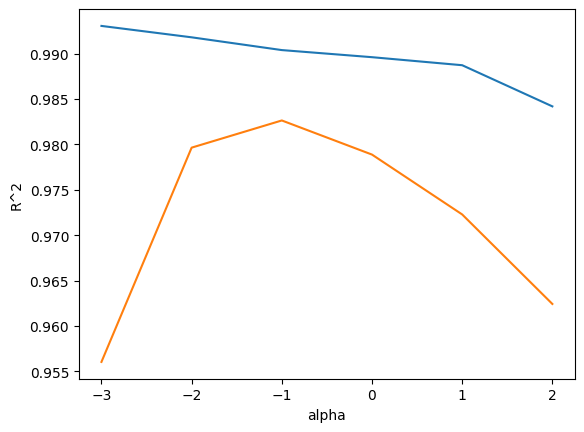

In [95]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [96]:
# 최적의 alpha 값 세팅

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.990404845594141
0.9826465162736733


# 라쏘 회귀 (Lasso Regression)

In [ ]:
# 기본적으로 Ridge 를 사용했던 방식과 매우 비슷 합니다.

In [97]:
from sklearn.linear_model import Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

```python
class sklearn.linear_model.Lasso(
  alpha=1.0,
  *,
  fit_intercept=True,
  precompute=False,
  copy_X=True,
  max_iter=1000,
  tol=0.0001,
  warm_start=False,
  positive=False,
  random_state=None,
  selection='cyclic')
```

In [98]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.9898014198970121
0.9798798667260247


In [99]:
# 적절할 alpha 값 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter : 최적의 계수를 찾기 위한 반복 계산 횟수

    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)

    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# ↓ train_score 와 test_score 리스트를 사용하여 그래프를 그립니다.
# 이 그래프도 x 축은 로그 스케일로 바꿔 그려봅니다.

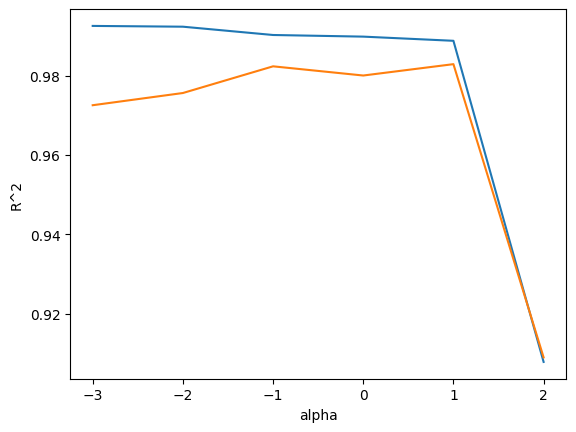

In [100]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [101]:
# 최적의 alpha 값으로 다시 훈련

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.988820885788649
0.9823020708550176


In [103]:
# 라쏘 모델은 계수 값을 아예 0으로 만들수도 있습니다.
# 라쏘 모델의 계수는 coef_ 속성에 저장되어 있습니다.  이 중에 0 인것을 세어보자.

print(np.sum(lasso.coef_ == 0))


40


In [ ]:
# 55개의 특성중에서 40개의 특성 계수가 0 이 되었다.
# 라쏘모델이 사용한 특성은 15개밖에 안됨.  -> 유용한 특성을 골라내는 용도로도 사용할수 있다.

# 모델의 과대 적합을 제어하기
문제 해결과정